In [1]:
setwd('/import/jliu//data2/')

In [14]:
load('ss.rda')

In [15]:
head(ss,2)
head(group,2)

,M1_CI10,M1_CI11,M1_CI12,M1_CI13,M1_CI14,M1_CI15,M1_CI16,M1_CI17,M1_CI18,M1_CI19,...,M2_CI16,M2_CI1,M2_CI2,M2_CI3,M2_CI4,M2_CI5,M2_CI6,M2_CI7,M2_CI8,M2_CI9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0.318253921,3.935315e-01,2.935098e-01,1.599373e-01,0.2428049456,2.909941e-01,1.905063e-01,2.338816e-01,2.623535e-01,2.018379e-01,...,0.2208101187,0.3776480227,0.1970735221,0.175091829,0.5328373332,0.3090491308,0.3077697053,0.2783487423,0.1015934245,0.1732225360
A1CF,-0.000116134,-4.774915e-05,-7.626468e-05,-5.731091e-05,-0.0001001864,-1.759899e-05,-6.417989e-05,-6.466464e-05,-5.127592e-05,-9.380482e-05,...,0.0001434875,0.0005043758,0.0001207507,0.000202004,0.0001031588,0.0001349349,0.0001881198,0.0001452564,0.0001837596,0.0002282007


[1] "subtype1" "subtype1"

In [13]:
library(IOBR)

In [16]:
expr_coad = ss

In [17]:
im_ssgsea <- deconvo_tme(eset = expr_coad,
                        method = "cibersort",
                        arrays = F
                        )


>>> Running CIBERSORT



In [18]:
save(im_ssgsea,file = 'cibersort2.rda')

In [21]:
library(dplyr)

In [22]:
#im_ssgsea2 = im_ssgsea %>% dplyr::select(-group) 

In [23]:
im_ssgsea2 = im_ssgsea

In [40]:
group1 = read.csv('./resultstrain2/resultstrain2.k=2.consensusClass.csv',header =F)
group1$V2 = paste0('subtype',group1$V2)
colnames(group1) = c('ID','group')
count = dplyr::left_join(group1,im_ssgsea2,by = 'ID')

In [27]:
library(tidyHeatmap)
library(tidyverse)
library(RColorBrewer)

In [58]:
pre = count[,c('ID','group')]

In [69]:
colnames(count)

[1] "ID"                                    
 [2] "group"                                 
 [3] "B_cells_naive_CIBERSORT"               
 [4] "B_cells_memory_CIBERSORT"              
 [5] "Plasma_cells_CIBERSORT"                
 [6] "T_cells_CD8_CIBERSORT"                 
 [7] "T_cells_CD4_naive_CIBERSORT"           
 [8] "T_cells_CD4_memory_resting_CIBERSORT"  
 [9] "T_cells_CD4_memory_activated_CIBERSORT"
[10] "T_cells_follicular_helper_CIBERSORT"   
[11] "T_cells_regulatory_(Tregs)_CIBERSORT"  
[12] "T_cells_gamma_delta_CIBERSORT"         
[13] "NK_cells_resting_CIBERSORT"            
[14] "NK_cells_activated_CIBERSORT"          
[15] "Monocytes_CIBERSORT"                   
[16] "Macrophages_M0_CIBERSORT"              
[17] "Macrophages_M1_CIBERSORT"              
[18] "Macrophages_M2_CIBERSORT"              
[19] "Dendritic_cells_resting_CIBERSORT"     
[20] "Dendritic_cells_activated_CIBERSORT"   
[21] "Mast_cells_resting_CIBERSORT"          
[22] "Mast_cells_activated_CIBERSORT"        
[23] "Eosinophils_CIBERSORT"                 
[24] "Neutrophils_CIBERSORT"                 
[25] "P-value_CIBERSORT"                     
[26] "Correlation_CIBERSORT"                 
[27] "RMSE_CIBERSORT"

In [67]:
ncol = dim(count)[2]-2
acp = count[3:ncol]

In [70]:
acp = acp[,which(colSums(acp) > 0)]
acp

B_cells_naive_CIBERSORT,B_cells_memory_CIBERSORT,Plasma_cells_CIBERSORT,T_cells_CD8_CIBERSORT,T_cells_CD4_naive_CIBERSORT,T_cells_CD4_memory_resting_CIBERSORT,T_cells_CD4_memory_activated_CIBERSORT,T_cells_regulatory_(Tregs)_CIBERSORT,T_cells_gamma_delta_CIBERSORT,NK_cells_resting_CIBERSORT,Monocytes_CIBERSORT,Macrophages_M0_CIBERSORT,Dendritic_cells_resting_CIBERSORT,Dendritic_cells_activated_CIBERSORT,Mast_cells_resting_CIBERSORT,Eosinophils_CIBERSORT,Neutrophils_CIBERSORT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.000000000,0.0093323454,2.332149e-05,0.10607413,0.0453320616,0.109244576,0.0843727392,0.0000000000,0.000000000,0.14886739,0.17498846,0.000000000,0.0000000000,2.251319e-03,0.0237566746,0.0000000000,0.2957570
0.000000000,0.0096281335,0.000000e+00,0.03406451,0.0457382838,0.017367358,0.0303661373,0.0000000000,0.010437960,0.07396255,0.12692262,0.000000000,0.0000000000,6.317392e-03,0.0279697240,0.0000000000,0.6172253
0.017738886,0.0000000000,1.293849e-03,0.18553302,0.0982715215,0.000000000,0.0387811911,0.0000000000,0.000000000,0.17202143,0.14837346,0.000000000,0.0000000000,0.000000e+00,0.0000000000,0.0000000000,0.3379866
0.006020678,0.0000000000,0.000000e+00,0.05496808,0.0420595478,0.024462892,0.0338743252,0.0177838178,0.000000000,0.10199384,0.12894004,0.000000000,0.0000000000,0.000000e+00,0.0096188341,0.0000000000,0.5802779
0.000000000,0.0244926643,0.000000e+00,0.03482763,0.0883486405,0.083830418,0.0242753366,0.0000000000,0.000000000,0.04301846,0.15569096,0.000000000,0.0000000000,9.959400e-03,0.0182188863,0.0000000000,0.5173376
0.031196199,0.0000000000,1.100360e-03,0.07910736,0.0865088445,0.131715900,0.0830620969,0.0000000000,0.040573774,0.18846369,0.07372971,0.000000000,0.0065520818,2.007335e-03,0.0083082449,0.0152183891,0.2524560
0.020809765,0.0018359833,0.000000e+00,0.15885323,0.0595526802,0.000000000,0.0159678483,0.0451021137,0.000000000,0.05581901,0.29982118,0.033106750,0.0000000000,7.592048e-03,0.0040329289,0.0014176606,0.2960888
0.000000000,0.0000000000,0.000000e+00,0.08135395,0.0657182465,0.087486052,0.0016536751,0.0027077033,0.000000000,0.11869737,0.11411046,0.000000000,0.0000000000,0.000000e+00,0.0254134385,0.0000000000,0.5028591
0.001969616,0.0000000000,0.000000e+00,0.04804073,0.0157052624,0.000000000,0.0641299744,0.0000000000,0.013132516,0.05259984,0.18082267,0.028513894,0.0000000000,1.512610e-03,0.0190469769,0.0000000000,0.5745259


In [71]:
cc = cbind(pre,acp)

In [73]:
cibersort_long <- cc %>% 
  select(ID,everything()) %>% 
  pivot_longer(- c(1:4),names_to = "cell_type",values_to = "fraction") %>% 
  dplyr::mutate(cell_type = gsub("_CIBERSORT","",cell_type),
                cell_type = gsub("_"," ",cell_type))

In [74]:
library(IOBR)

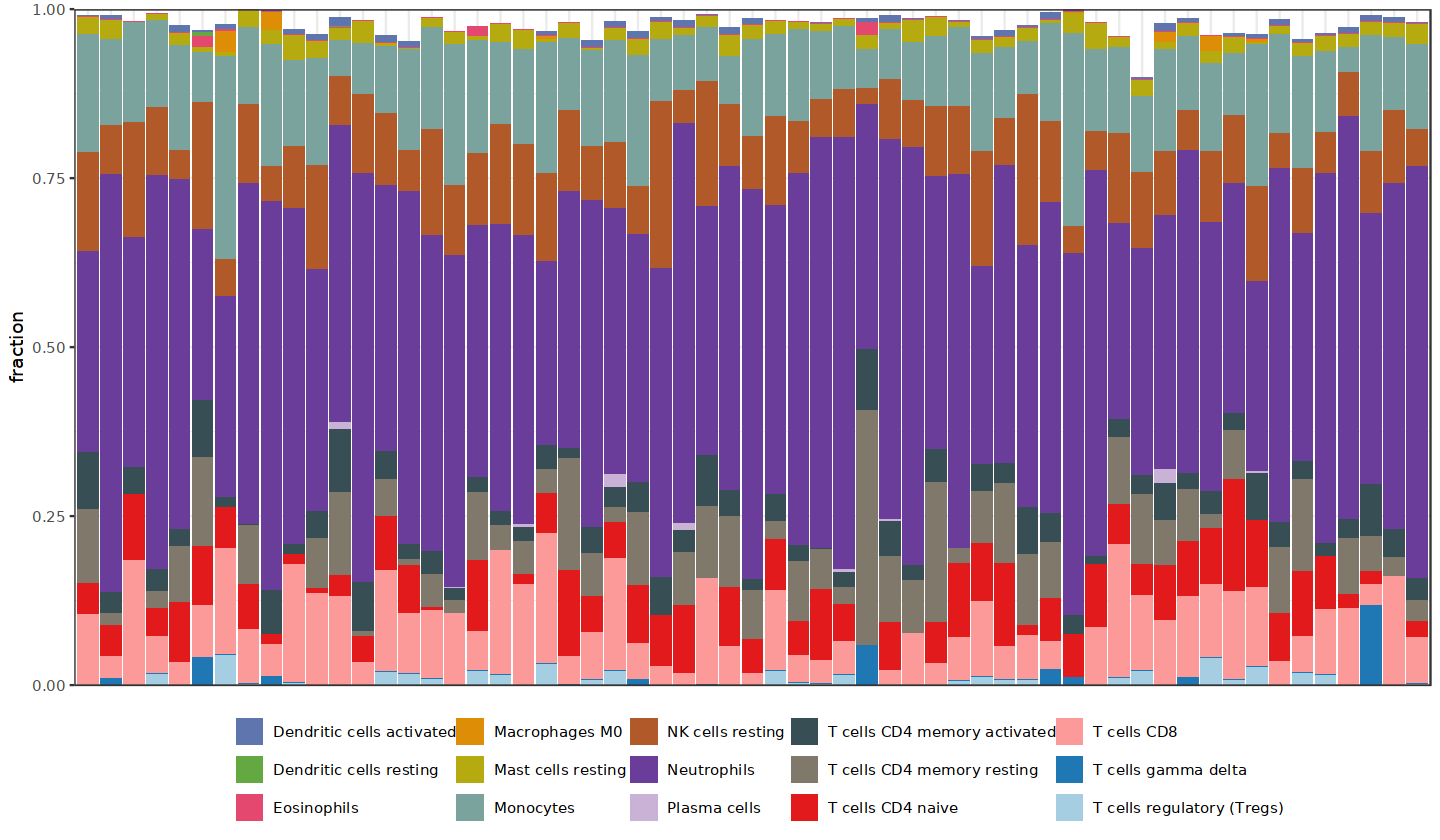

In [75]:
p1 <- cibersort_long %>% 
  ggplot(aes(ID,fraction))+
  geom_bar(stat = "identity",position = "stack",aes(fill=cell_type))+
  labs(x=NULL)+
  scale_y_continuous(expand = c(0,0))+
  scale_fill_manual(values = palette4,name=NULL)+ # iobr还给大家准备了几个色盘，贴心！
  theme_bw()+
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        legend.position = "bottom"
        )
p1

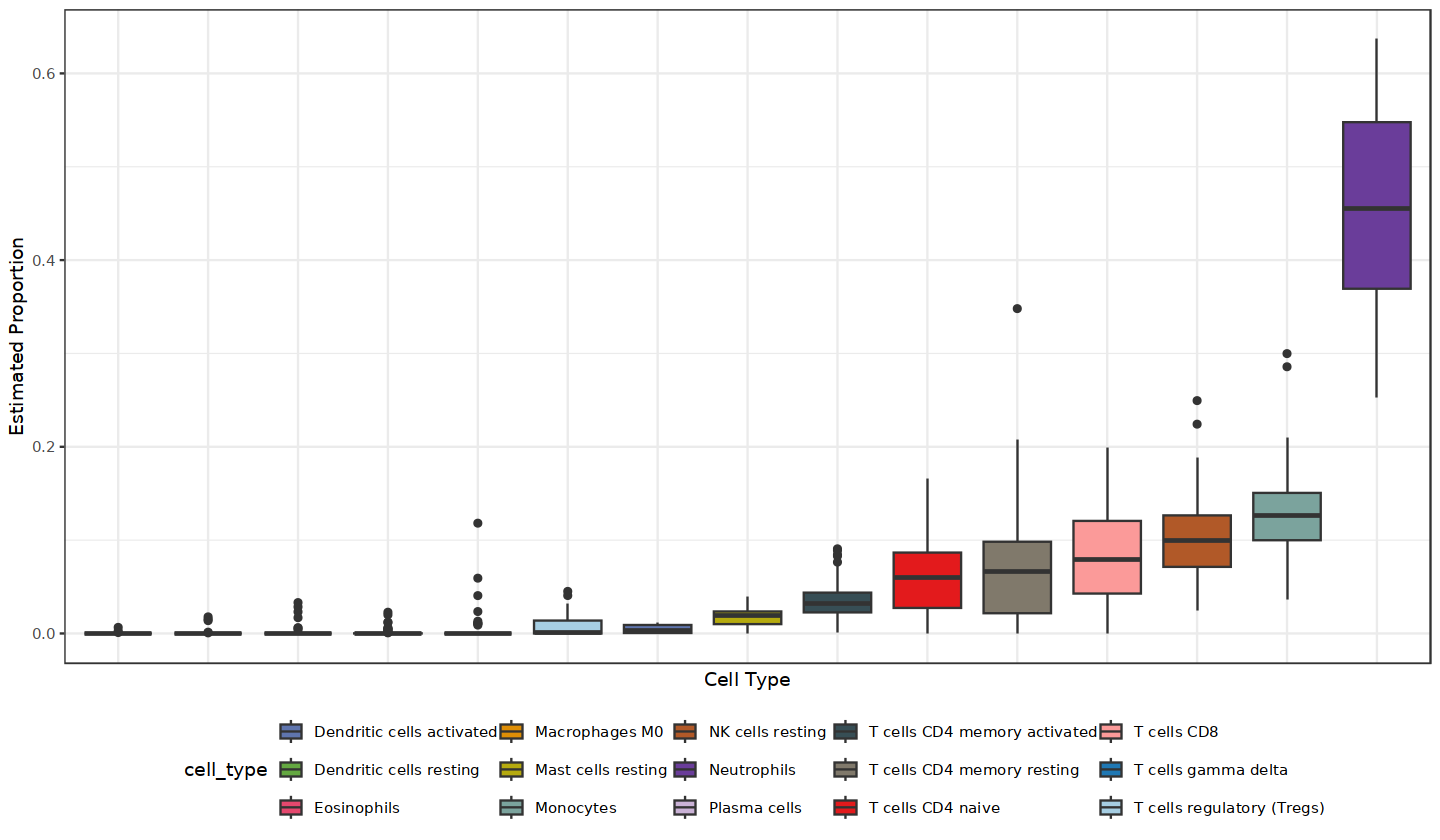

In [76]:
library(forcats)

p2 <- ggplot(cibersort_long,aes(fct_reorder(cell_type, fraction),fraction,fill = cell_type)) + 
  geom_boxplot() + 
  #geom_jitter(width = 0.2,aes(color=cell_type))+
  theme_bw() + 
  labs(x = "Cell Type", y = "Estimated Proportion") +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        legend.position = "bottom") + 
  scale_fill_manual(values = palette4)
p2

In [77]:
options(repr.plot.width = 12)

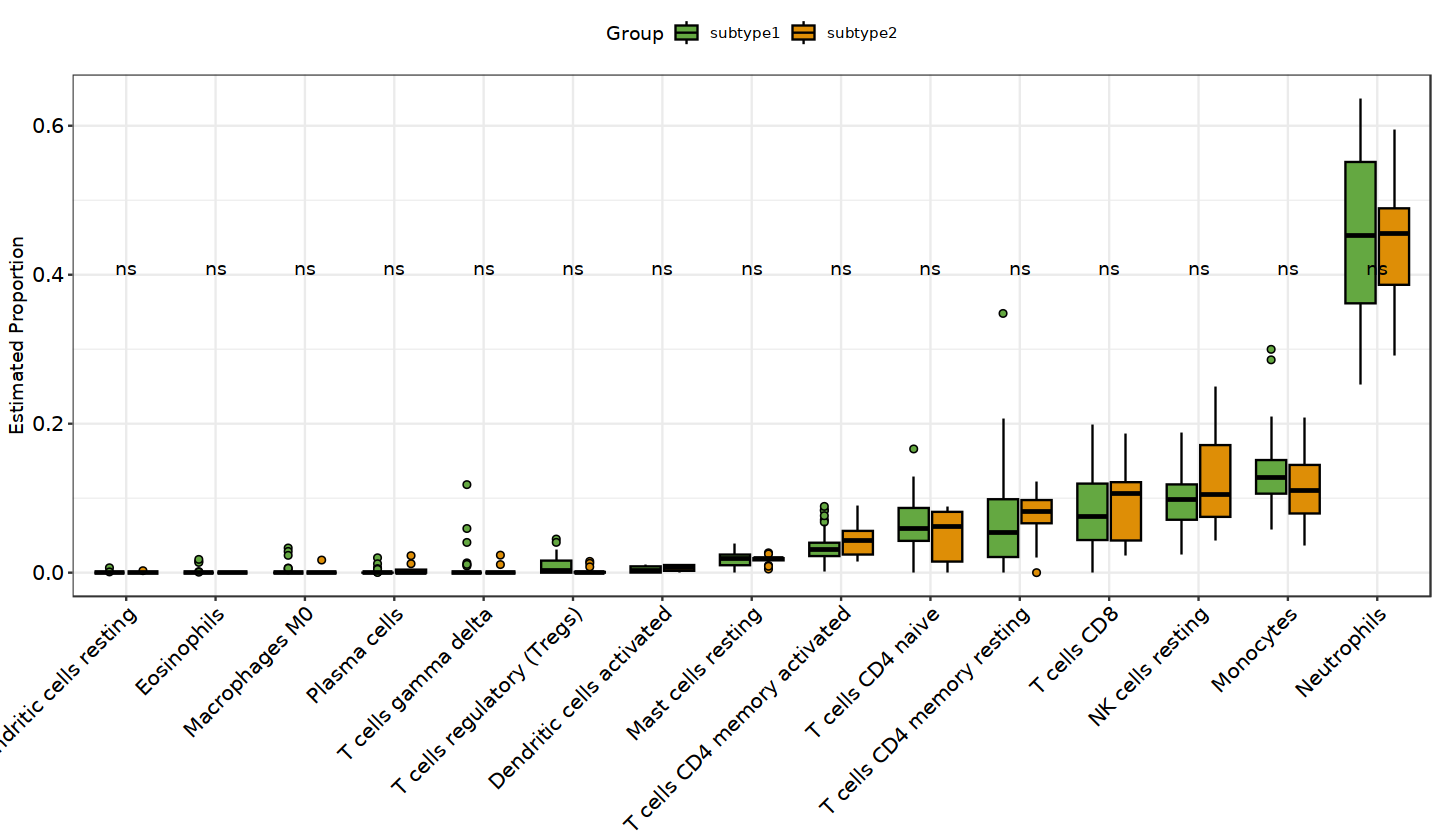

In [78]:
library(ggpubr)
library(stringr)

# 分组
cibersort_long$Group = cibersort_long$group

p3 <- ggplot(cibersort_long,aes(fct_reorder(cell_type,fraction),fraction,fill = Group)) + 
  geom_boxplot(outlier.shape = 21,color = "black") + 
  scale_fill_manual(values = palette1[c(2,4)])+ 
  theme_bw() + 
  labs(x = NULL, y = "Estimated Proportion") +
  theme(legend.position = "top") + 
  theme(axis.text.x = element_text(angle=45,hjust = 1),
        axis.text = element_text(color = "black",size = 12))+
  stat_compare_means(aes(group = Group,label = ..p.signif..),
                     method = "kruskal.test",label.y = 0.4)
p3